In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import seaborn as sns

In [3]:
df420 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_04_bicycle.csv')
df520 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_05_bicycle.csv')
df620 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_06_bicycle.csv')
df720 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_07_bicycle.csv')
df820 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_08_bicycle.csv')
df920 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_09_bicycle.csv')
df1020 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_10_bicycle.csv')
df1120 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_11_bicycle.csv')
df1220 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2020_12_bicycle.csv')
df121 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2021_01_bicycle.csv')
df221 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2021_02_bicycle.csv')
df321 = pd.read_csv(r'C:\Users\roman\OneDrive\Bureau\python_data\ride_bicycle_data\2021_03_bicycle.csv')

In [4]:
df = pd.concat([df420, df520, df620, df720, df820, df920,
                df1020, df1120, df1220, df121, df221,
                df321], sort=False)

In [74]:
#Check duplicates rows
df.drop_duplicates().head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time,day
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,Sunday
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,Friday
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,Wednesday
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,Tuesday
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,Saturday


In [7]:
#check missing value
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent']) #Only 99 missing data on station ID, nothing to worry about it

miss_data
"""
Less than 5 % of the data is missing, so we don't need to remove anything
"""

"\nLess than 5 % of the data is missing, so we don't need to remove anything\n"

In [8]:
#change date to calculate the time
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [9]:
#Create variable time
df['time'] = df['ended_at'] - df['started_at'] 
df['time'] = df['time'].dt.total_seconds()/60

In [10]:
df['day'] = pd.to_datetime(df['started_at'], format = '%Y-%m-%d %I-%p')
df['day'] = df['day'].dt.day_name()

In [11]:
df['time'].describe().astype('int')
#We can see time spent by riders can be a negative number, which is can't be correct. So it means we need to clean all the data that has a ended_at > started_at.

count    3489748
mean          24
std          390
min       -29049
25%            7
50%           14
75%           26
max        58720
Name: time, dtype: int32

In [12]:
#Counts the most used station
station_count = df['start_station_name'].value_counts().reset_index(name='Counts')
station_count.rename(columns={'index': 'start_station_name'}, inplace=True)
station_count

"""
Some of the station was used only one in the past 12 months, so we can take it out of the dataset as it is not representative to our database
"""

'\nSome of the station was used only one in the past 12 months, so we can take it out of the dataset as it is not representative to our database\n'

In [13]:
#For a station to be taken into account, it must be at least used 100 in the last 12 months
station_count.drop(station_count.index[station_count['Counts'] <= 100], inplace=True)

In [14]:
station_count.tail()

,start_station_name,Counts
603,Eberhart Ave & 91st St,111
604,Kenton Ave & Madison St,108
605,Halsted St & 51st St,106
606,Elizabeth St & 47th St,104
607,Malcolm X College Vaccination Site,101


In [15]:
#Merge the most used stations to the dataset
merged_df = df.merge(station_count, how = 'inner', on = ['start_station_name'])

In [16]:
#Do the same for the end_station_count
end_station_count = merged_df['end_station_name'].value_counts().reset_index(name='Counts')
end_station_count.rename(columns={'index':'end_station_name'}, inplace=True)

In [17]:
#Delete station visited less than a 100 times (end_station_name)
end_station_count.drop(end_station_count.index[end_station_count['Counts'] <= 100], inplace=True)

In [18]:
#merged with merged_df 
merged_df = merged_df.merge(end_station_count, how = 'inner', on = ['end_station_name'])
merged_df.drop(['Counts_x', 'Counts_y'], axis = 1, inplace = True) 

In [20]:
import datetime
#get the month with another column 
merged_df['month'] = merged_df['started_at'].dt.month

In [19]:
import sweetviz as sv

In [20]:
df_report = merged_df[['ride_id','rideable_type','member_casual', 'time', 'day','month', 'start_station_name','end_station_name']]
report=sv.analyze(df_report)
report.show_html()

"""
We can see that ride_id can't be analysed as almost all of them are differents
The most used bike is docked_bike at 78%
There are more members than casuals
Week days are the busiest days
people tend to do bike especially in summer
"""


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
#Delete the outliers and keep all the rows that can be interesting
merged_df = merged_df[(merged_df.time < merged_df.time.quantile(.995)) & (merged_df.time > merged_df.time.quantile(.15))]

"""
we know that time distribution is skewed to the right.
"""

'\nwe know that time distribution is skewed to the right.\n'

<AxesSubplot:>

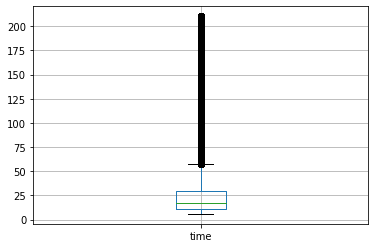

In [26]:
merged_df.boxplot('time')

In [36]:
#separate casual and member data
casual_df = merged_df[merged_df['member_casual'] == 'casual']
casual_df = casual_df.rename(columns={'member_casual':'casual'})
member_df = merged_df[merged_df['member_casual'] == 'member']
member_df = member_df.rename(columns={'member_casual':'member'})

In [37]:
#Get the mean time spent by riders per day as a casual
casual_daytime = casual_df.groupby("day").agg({'casual':'count',
                                               'time':'mean'}).astype('int')
casual_daytime = casual_daytime.reset_index()
casual_daytime = casual_daytime.rename(columns={'time':'casual_time'})

In [38]:
#Get the mean time spent by riders per day as a member
member_daytime = member_df.groupby("day").agg({'member':'count',
                                               'time':'mean'}).astype('int')
member_daytime = member_daytime.reset_index()
member_daytime = member_daytime.rename(columns={'time':'member_time',
                                               'day':'day1'})

In [39]:
mc_daytime = pd.concat([casual_daytime, member_daytime], axis=1)
mc_daytime.drop(['day1'], axis=1, inplace=True)

In [75]:
mc_daytime.head()

,day,casual,casual_time,member,member_time
1,Monday,129202,34,196201,17
5,Tuesday,123562,32,209581,17
6,Wednesday,134600,31,226523,17
4,Thursday,141860,31,223071,17
0,Friday,179500,32,229026,17


In [41]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mc_daytime['day'] = pd.Categorical(mc_daytime['day'], categories=cats, ordered=True)
mc_daytime = mc_daytime.sort_values('day')

In [76]:
mc_daytime.head()

,day,casual,casual_time,member,member_time
1,Monday,129202,34,196201,17
5,Tuesday,123562,32,209581,17
6,Wednesday,134600,31,226523,17
4,Thursday,141860,31,223071,17
0,Friday,179500,32,229026,17


Text(0.5, 1.0, 'Members / Casual riders comparaison per day and avg usage (mn)')

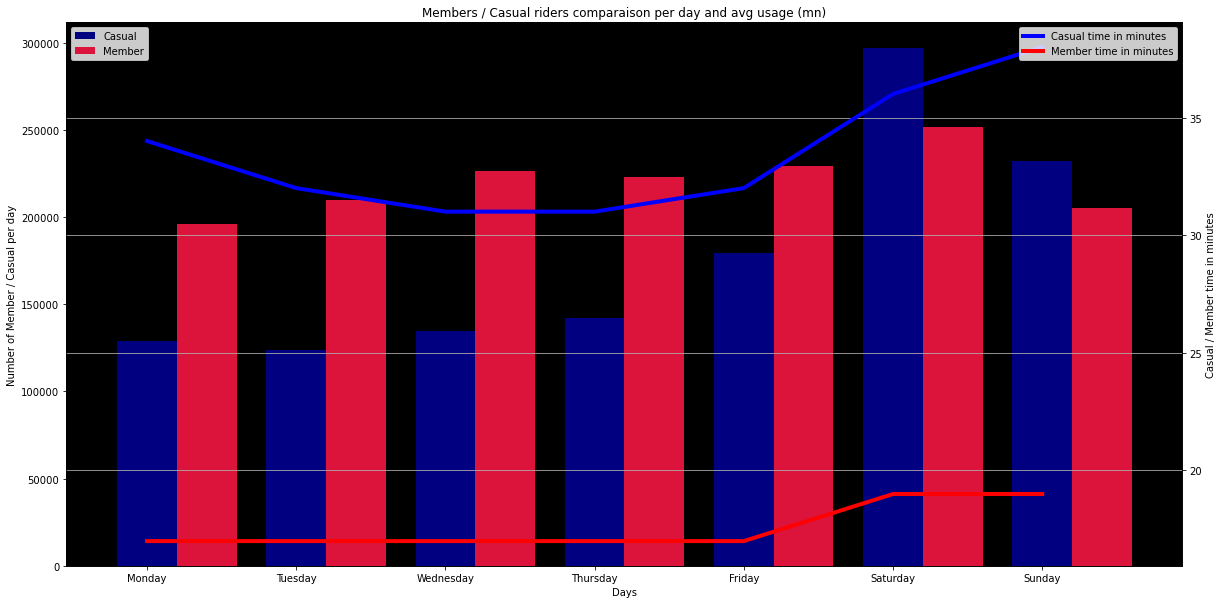

In [44]:
#Plot for data vizualisation
import matplotlib.pyplot as plt
%matplotlib inline

w = 0.4
x = mc_daytime['day']
y1 = mc_daytime['casual']
y2 = mc_daytime['member']
y3 = mc_daytime['casual_time']
y4 = mc_daytime['member_time']

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()

ax.bar(bar1, y1,w, label='Casual', color = 'navy')
ax.bar(bar2, y2,w, label='Member', color = 'crimson')
ax2.plot(x, y3, color = 'blue', label='Casual time in minutes', linewidth=4.0)
ax2.plot(x, y4, color = 'red', label='Member time in minutes', linewidth=4.0)
ax.patch.set_facecolor('black')


plt.grid(True)
plt.xticks(bar1,x)
ax.legend(loc=2)
ax2.legend(loc=1)
plt.xlabel('Days')
ax.set_xlabel("Days")
ax.set_ylabel("Number of Member / Casual per day")
plt.ylabel('Casual / Member time in minutes')


plt.title('Members / Casual riders comparaison per day and avg usage (mn)')

In [63]:
"""
We can see members and casuals behave differently.
Members behavior does not change over the week, we can see a little increase on the week end as well as the average time spent on a bike
Casual has two kind of behaviors. 
First: Most of the casuals hang out on week end, the data shows that on average, there are most casuals on a bike than members on the same day. 
Their average time also increased and can go up to 38mn on average. 

What is the thought about it ? 
Members are regular people who travels on a daily basis. 
However, casual can be people who like to ride and have some fun, or tourist who wants to visit Chicago and are willing to pay only for one ride. 

This was a graph that took all the days from the last 12 months with the average riders in this given time. It is not sure that behaviors used to be the same at a given period.
Further details are needed to know more about this analysis.
"""

'\nWe can see members and casuals behave differently.\nMembers behavior does not change over the week, we can see a little increase on the week end as well as the average time spent on a bike\nCasual has two kind of behaviors. \nFirst: Most of the casuals hang out on week end, the data shows that on average, there are most casuals on a bike than members on the same day. \nTheir average time also increased and can go up to 38mn on average. \n\nWhat is the thought about it ? \nMembers are regular people who travels on a daily basis. \nHowever, casual can be people who like to ride and have some fun, or tourist who wants to visit Chicago and are willing to pay only for one ride. \n\nFurther details are needed to know more about this analysis.\n'

In [64]:
#Get the mean time spent by riders per day as a member
member_monthtime = member_df.groupby("month").agg({'member':'count',
                                                   'time':'mean'}).astype('int')
member_monthtime = member_monthtime.reset_index()
member_monthtime.rename(columns={'time':'member_time'}, inplace=True)

In [65]:
casual_monthtime = casual_df.groupby("month").agg({'casual':'count',
                                               'time':'mean'}).astype('int')
casual_monthtime = casual_monthtime.reset_index()
casual_monthtime.rename(columns={'time':'casual_time',
                                 'month':'month1'}, inplace=True)

In [66]:
mc_monthtime = pd.merge(member_monthtime, casual_monthtime, left_index=True, right_index=True)
mc_monthtime.drop('month1', axis=1, inplace=True)

In [67]:
mc_monthtime.head()

,month,member,member_time,casual,casual_time
0,1,48940,15,12373,22
1,2,26655,16,7616,28
2,3,97821,16,68058,31
3,4,50531,19,22129,35
4,5,96785,21,81430,39


Text(0.5, 1.0, 'Members / Casual riders comparaison per month and avg usage (mn)')

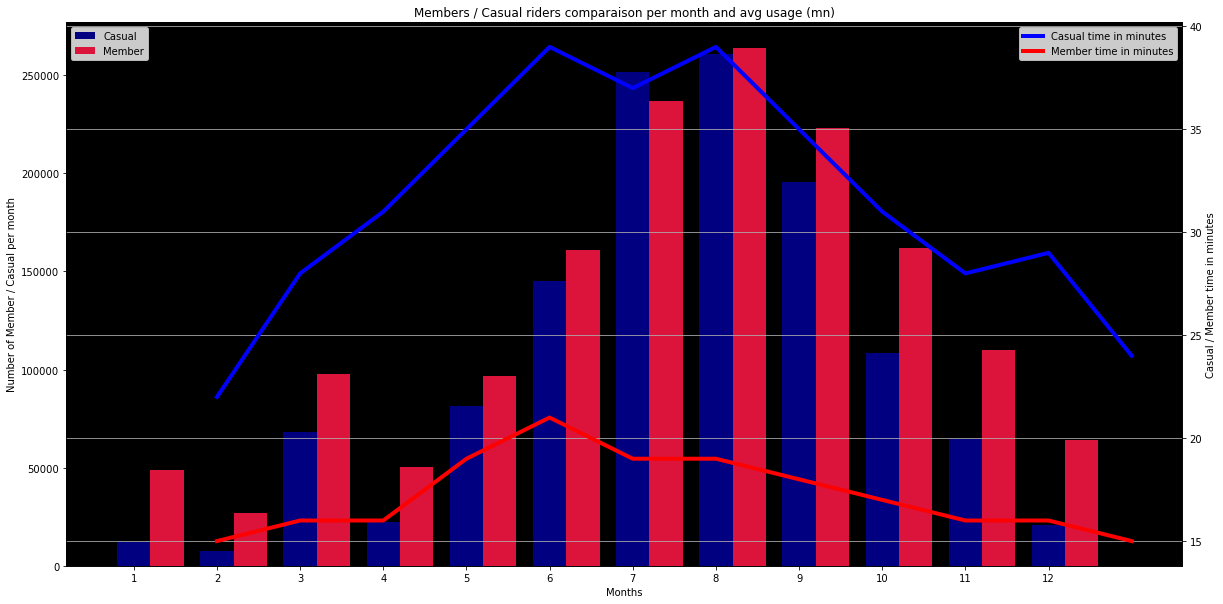

In [70]:
#Plot for data vizualisation

w = 0.4
x = mc_monthtime['month']
y1 = mc_monthtime['casual']
y2 = mc_monthtime['member']
y3 = mc_monthtime['casual_time']
y4 = mc_monthtime['member_time']

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()

ax.bar(bar1, y1,w, label='Casual', color = 'navy')
ax.bar(bar2, y2,w, label='Member', color = 'crimson')
ax2.plot(x, y3, color = 'blue', label='Casual time in minutes', linewidth=4.0)
ax2.plot(x, y4, color = 'red', label='Member time in minutes', linewidth=4.0)
ax.patch.set_facecolor('black')


plt.grid(True)
plt.xticks(bar1,x)
ax.legend(loc=2)
ax2.legend(loc=1)
ax.set_xlabel("Months")
ax.set_ylabel("Number of Member / Casual per month")
plt.ylabel('Casual / Member time in minutes')


plt.title('Members / Casual riders comparaison per month and avg usage (mn)')

In [ ]:
"""
Members: 
Amount of people increase from january to august and begin to decrease after this date. 
Their time spent on aveerage increase and get his pick in june, then it decreased until the next year. We can see that the most higher time on average is in summer.
Even if the time spent by people is bigger in summer, the difference is only about 5mn, so the spread of the average time tend to not change a lot.

Casuals:
Very few people in winter and most of them in summer. the spread is very high
Also their time on average depend on the month. We can see it increased by a lot (increase by almost 15 points), keep this peak until august and decrease quickly in september.

As we can see, behaviors are different and depend on a specific period. On a one hand, summer used to be the best season for riders to hung out with a bike. On the other hand, only few people accept to ride on a bike. 

So the new hypothesis is: Does the amount of riders is correlated to the temperature ? 
Further analysis is needed
"""

In [51]:
#The % of member using different bikes
member_df.groupby('rideable_type')['member'].count() / member_df['member'].count()*100

rideable_type
classic_bike     11.992214
docked_bike      75.784522
electric_bike    12.223264
Name: member, dtype: float64

In [52]:
#The % of casual using different bikes
casual_df.groupby('rideable_type')['casual'].count() / casual_df['casual'].count()*100

rideable_type
classic_bike      5.052189
docked_bike      83.582727
electric_bike    11.365083
Name: casual, dtype: float64

In [ ]:
"""
Next task to do: 
- Do a data cleaning with the end_station_name with the same way as I did in the start_station_name (done)
- Change date title column to 'day' (done)
- Add other columns 'month' and 'year' and look at the trend (done)
- Create graphics to explain the trend
- Check the hypothesis that the number of riders is correlated to the temperature
This is for the first part of the project

Second part:
- Divide data set into 2 dataframe casual and member
- Create a map of chicago
- Put the ID on the map 
- Look at the travel, distance and accuracy of the time data (hypothesis to be sure the data fit the reality)
- Check out the trend, most used travel given the person is member or casual 
- Do it on tableau 
"""

In [54]:
mc_monthtime['temperature'] = pd.DataFrame(Temperature)

In [ ]:
"""
Can see big differences between 
"""

In [57]:
#Is it correlated to the temperature ? 
#Took average degrees from this site: https://www.climatsetvoyages.com/climat/etats-unis/chicago
Temperature = {'Temperature':[-4.6,-2.4,3.2,9.4,15.1,20.5,23.3,22.4,18.1,11.4,4.6,-2.3]}
mc_monthtime['temperature'] = pd.DataFrame(Temperature)

In [59]:
mc_monthtime['temperature'] = pd.DataFrame(Temperature)
mc_monthtime.head()

,month,member,member_time,casual,casual_time,temperature
0,1,48940,15,12373,22,-4.6
1,2,26655,16,7616,28,-2.4
2,3,97821,16,68058,31,3.2
3,4,50531,19,22129,35,9.4
4,5,96785,21,81430,39,15.1


Text(32.09375, 0.5, 'User amount and time')

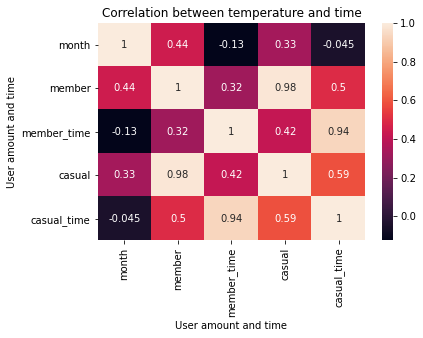

In [73]:
correlated_matrix = mc_monthtime.corr(method='pearson')
sns.heatmap(correlated_matrix, annot=True)

plt.title('Correlation between temperature and time')

plt.xlabel('User amount and time')

plt.ylabel('User amount and time')

In [72]:
"""
Very big correlation at 0.86 for the member and 0.89 for the casual, then the time spent outside with the casual is correlated at 83 % with the temperature, which is also highly correlated
We can't be sure that the temperature is a decisive factor, but it gives us some insights and further analysis may confirm that a better temperature can increase the amount of riders and their time
"""

"\nVery big correlation at 0.86 for the member and 0.89 for the casual, then the time spent outside with the casual is correlated at 83 % with the temperature, which is also highly correlated\nWe can't be sure that the temperature is a decisive factor, but it gives us some insights and further analysis may confirm that a better temperature can increase the amount of riders and their time\n"

In [ ]:
"""
As a summary:
There are more members than casuals
Casuals number is very spreaded across the year, most of them rides in summer
Week end are very popular among casual
Members are also spreaded across the year, but members tend to be more less spread. 

Casuals can be:
People who want to enjoy the city on bike 
Tourist that buy a pass for a short moment (less than 1 day)

Members are people who use more the bike on a daily basis but they spend less time than casual, especially on week end
"""